<h3>Preprocessing stage</h3>

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
with open('AstroData.csv', 'w', encoding='utf-8') as csvdata:
    tree = ET.parse('3triples_Astronaut_train_challenge.xml')
    root = tree.getroot()
    for child in root.iter('mtriple'):
        info = child.text
        info_str = str(info.replace('_', ' ').replace('"', '')).split('|')
        csvdata.write(str(info_str[0].lower()).strip() + ',' + str(info_str[1].lower()).strip() + ',' + str(info_str[2].replace(',', '').lower()).strip() + '\n')

In [3]:
file = 'AstroData.csv'
df = pd.read_csv(file, names=["ACTOR", "PREDICATE", "ANSWER"])

In [4]:
df.head()

,ACTOR,PREDICATE,ANSWER
0,alan bean,alma mater,ut austin b.s. 1955
1,alan bean,time in space,100305.0(minutes)
2,alan bean,was selected by nasa,1963
3,alan bean,alma mater,ut austin b.s. 1955
4,alan bean,was a crew member of,apollo 12


In [5]:
df = df.drop_duplicates()

In [6]:
df.head()

,ACTOR,PREDICATE,ANSWER
0,alan bean,alma mater,ut austin b.s. 1955
1,alan bean,time in space,100305.0(minutes)
2,alan bean,was selected by nasa,1963
4,alan bean,was a crew member of,apollo 12
5,alan bean,date of retirement,june 1981


In [7]:
G = nx.from_pandas_dataframe(df, 'ACTOR', 'ANSWER', edge_attr = 'PREDICATE')

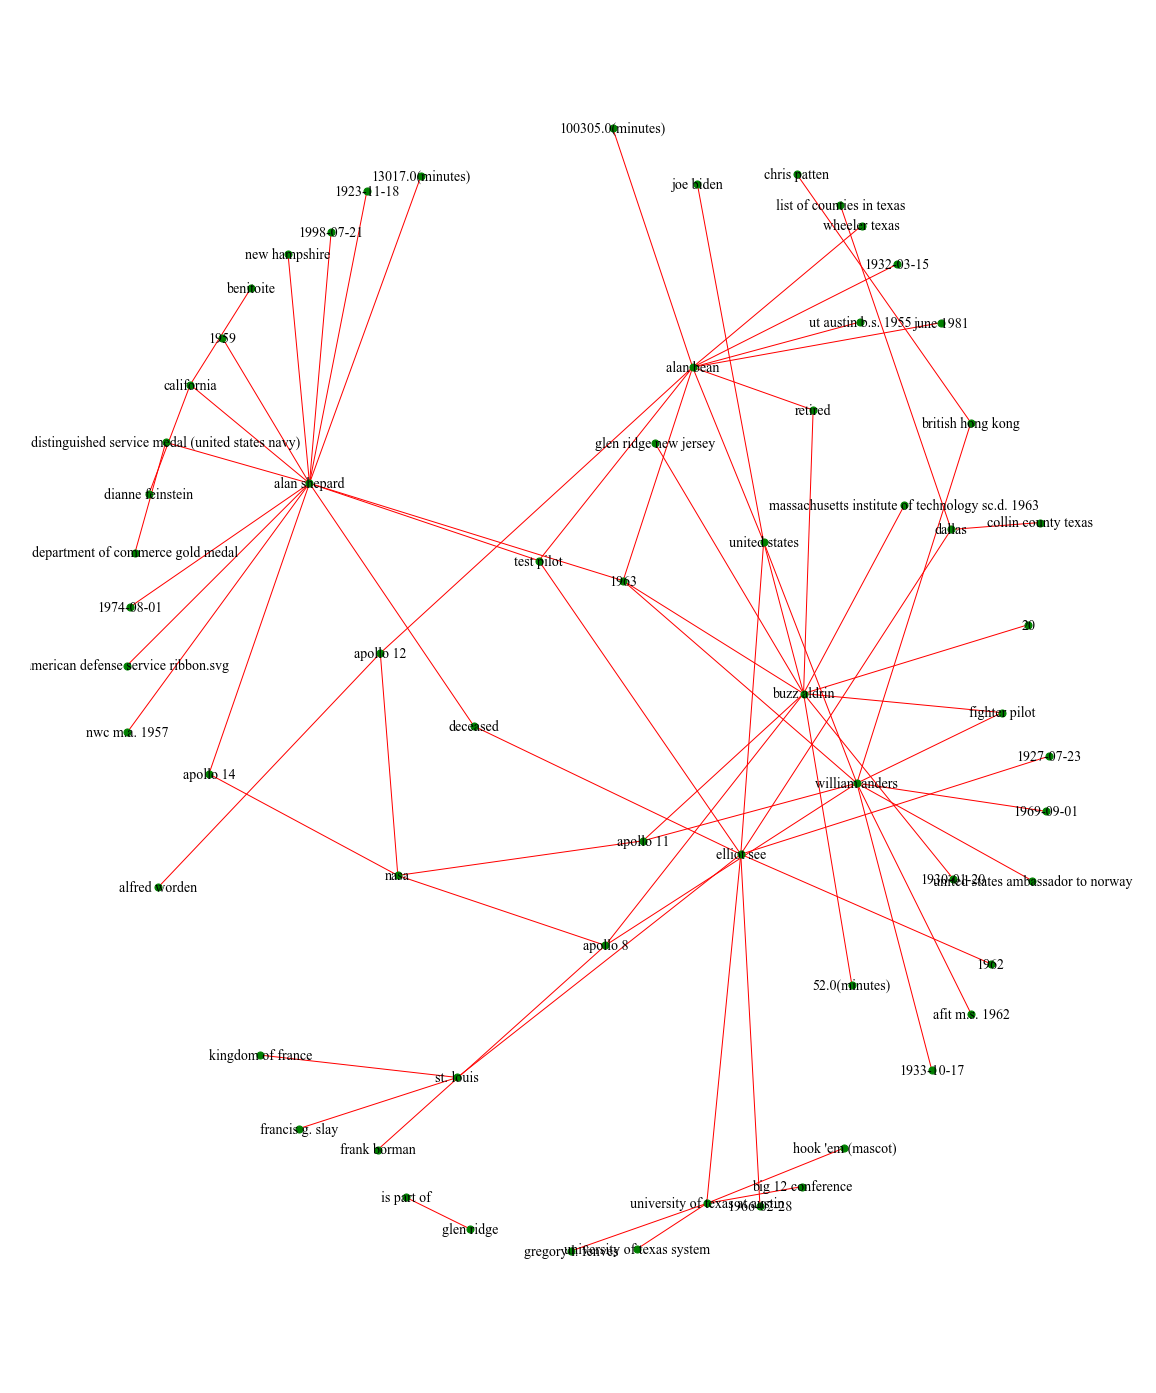

In [8]:
plt.figure(figsize=(20, 25))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='green', node_size=50) 
nx.draw_networkx_edges(G, pos, edge_color='red')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='Times New Roman')
plt.axis('off')
plt.show()

<h3>Question-answer system stage</h3>

In [9]:
G.neighbors('buzz aldrin')

['apollo 8',
 'massachusetts institute of technology sc.d. 1963',
 'retired',
 'united states',
 'fighter pilot',
 '1930-01-20',
 '20',
 'apollo 11',
 '1963',
 'glen ridge new jersey',
 '52.0(minutes)']

In [10]:
G.edges('alan bean')

[('alan bean', 'test pilot'),
 ('alan bean', '1963'),
 ('alan bean', 'united states'),
 ('alan bean', '100305.0(minutes)'),
 ('alan bean', 'wheeler texas'),
 ('alan bean', 'apollo 12'),
 ('alan bean', 'june 1981'),
 ('alan bean', 'retired'),
 ('alan bean', '1932-03-15'),
 ('alan bean', 'ut austin b.s. 1955')]

In [11]:
for link in G.edges('buzz aldrin'):
    actions = G.get_edge_data(link[0], link[1])
    for values in actions.values():
        print(values)

backup pilot
alma mater
status
nationality
occupation
birth date
awards
was a crew member of
was selected by nasa
birth place
time in space


In [22]:
question = input('Print the name of astronaut and info you want to know about him separating with a comma (i.e. "Buzz Aldrin, time in space"): ')
ques = question.split(', ')

actor = ques[0].lower()
predic = ques[1].lower()
answer = None

if actor in G.nodes():
    for link in G.edges(actor):
        actions = G.get_edge_data(link[0], link[1])
        for value in actions.values():
            if str(value) == str(predic):
                answer = link[1]
else:
    print("Format of your question is invalid, or this program just has not enough information to answer this question :(")
    
if answer is not None:
    print(answer)
elif actor in G.nodes() and answer is None:
    print("Sorry, I don't know this :(")

Print the name of astronaut and info you want to know about him separating with a comma (i.e. "Buzz Aldrin, time in space"): alan shepard, time in space
13017.0(minutes)
